In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
from matplotlib import animation, rc
from IPython.display import HTML, Image

%matplotlib inline

## Description

이 노트북은 선형변환을 animation화 하여 linear transformation에 대한 직관적 이해를 돕기 위한 것 입니다. <br>
2차원 공간을 선형변환하는 예시등을 통해 공간이 어떻게 변환하는지 확인할 수 있습니다. <br>
직접 노트북을 수정하여 2차원 공간에서 다양한 변환을 직접 확인해보실 수도 있습니다. <br>
이 노트북은 책 "프로그래머를 위한 선형대수" 의 Ruby코드를 참고하여 파이썬으로 옮긴 코드입니다. <br>

많은 분들이 선형변환에 대하여 직관을 기르시고 거부감을 줄이는데 이 노트북이 도움이 되었으면 합니다. <br>

## Variable Initialize

In [2]:
nFrames = 20
nInterval = 10

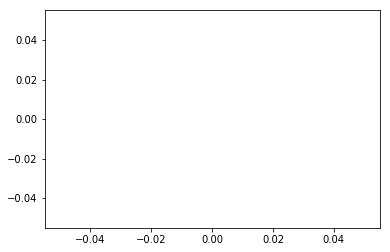

In [3]:
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)


arrow1 = np.matrix([(1,0)])
arrow2 = np.matrix([(0,1)])

coord = np.matrix([(-1,-1),(-1,1),(1,1),(1,-1)])


## Method describe
calculateCoordinate
- 2차원 평면, 그리고 2개의 화살표의 linear transform 후 변환되는 좌표를 계산하는 함수

setDimensionCoord
- 변환된 좌표를 적용하여 변환된 평면을 그리는 함수


In [4]:
# Background Space Visualize

def calculateCoordinate(i, nFrames):
    
    finalBg = np.matmul(coord, transformMat)
    finalArrow1 = np.matmul(arrow1, transformMat)
    finalArrow2 = np.matmul(arrow2, transformMat)
    
    diffBg =  ((finalBg - coord)/nFrames)*i
    diffArrow1 = ((finalArrow1 - arrow1)/nFrames)*i
    diffArrow2 = ((finalArrow2 - arrow2)/nFrames)*i
    
    return (diffBg, diffArrow1, diffArrow2)

def setDimensionCoord(diffBg):
    initBgCoord = np.matrix([(-1,-1),(-1,1),(1,1),(1,-1)])
    bg = np.asarray( initBgCoord + diffBg )
    
    coordinateList = list()
    for xy in bg:
        coordinateList.append((xy.item(0), xy.item(1)))
    patches = []
    polygon = Polygon(np.array(coordinateList) ,True)
    polygon.set_color('#0099FF')
    patches.append(polygon)
    p = PatchCollection(patches, alpha=0.3)
    return p
    


In [5]:
def reset_ax():
    ax.clear()
    ax.set_xlim((-2, 2))
    ax.set_ylim((-2, 2))
    

In [6]:
def animate(i):
    reset_ax()
    
    x = np.linspace(0,1,100)
    y = np.linspace(0,1,100)
    diffBg, diffArrow1, diffArrow2 = calculateCoordinate(i, nFrames)
    
    bg = setDimensionCoord(diffBg)
    
    a1 = arrow1 + diffArrow1
    a2 = arrow2 + diffArrow2
    
    a1 = plt.Arrow(0,0,a1.item(0),a1.item(1), color='black')
    a2 = plt.Arrow(0,0,a2.item(0),a2.item(1), color='black')
    
    ax.add_collection(bg)
    ax.add_patch(a1)
    ax.add_patch(a2)
    line, = ax.plot([], [], lw=1)
    line.set_data([], [])
    return (line,)
    

### Description of init function


animation.FuncAnimation의 인자 init_func에 아래 중 하나의 함수를 적용하여 
어떤 벡터를 활용하여 선형 변환하였을 때, 그 공간이 변환하는 과정을 확인할 수 있습니다.
예를 들어 anim = animation.FuncAnimation(fig, animate, init_func=init1, frames = nFrames, interval=nInterval, blit=True)로 코드 작성 후에 스크립트를 수행하면 x축으로 1.5배 확장, y축으로 0.5배 축소되는 공간을 애니메이션으로 확인할 수 있습니다.




##### init5


In [7]:
def init1():
    global transformMat
    transformMat = np.matrix([(1.5,0),(0,0.5)])
    line.set_data([],[])
    return (line,)
def init2():
    global transformMat
    transformMat = np.matrix([(0,0),(0,0.5)])
    line.set_data([],[])
    return (line,)
def init3():
    global transformMat
    transformMat = np.matrix([(1.5,0),(0,-0.5)])
    line.set_data([],[])
    return (line,)
def init4():
    global transformMat
    transformMat = np.matrix([(1,-0.3),(-0.7,0.6)])
    line.set_data([],[])
    return (line,)
def init5():
    global transformMat
    transformMat = np.matrix([(1,-0.5),(0,1.0)])
    line.set_data([],[])
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init5, frames = nFrames, interval=nInterval, blit=True)

In [8]:
HTML(anim.to_jshtml())

##### init1
<br>
general diagonal matrix <br>
Expand horizontal space (*1.5) and collapse vertical space (*0.5) <br>
area's magnification power is 0.75 = 1.5*0.5, this is equal Determinant of A <br>

일반적인 대각 행렬을 이용하여 선형변환을 하는 것을 보여주는 메쏘드 <br>
x축으로 1.5배, y축으로 0.5배 공간이 변환 됨 <br>
이럴 경우 공간의 배율은 0.75배가 되고 (1.5*0.5 = 0.75) 이는 A의 행렬식과 일치함을 알 수 있다. <br>

\begin{equation*}
A =  
\begin{bmatrix}
1.5 & 0 \\
0 & 0.5 \\
\end{bmatrix}
\end{equation*}

In [9]:
#x축으로 1.5배, y축으로 0.5배 공간이 변환 됨
anim = animation.FuncAnimation(fig, animate, init_func=init1, frames = nFrames, interval=nInterval, blit=True)
#HTML(anim.to_jshtml())

anim.save('./files/animation1.gif', writer='imagemagick', fps=3)
Image(url='./files/animation1.gif')


##### init2
<br>
general diagonal matrix with 0 in diagonal element <br>
Eliminate horizontal space (*0) and collapse vertical space (*0.5) <br>
area's magnification power is 0 = 0.0*0.5, this is equal Determinant of A <br>

x축이 0인 대각행렬로 선형변환을 하는 것을 보여주는 메쏘드 <br>
x축으로 0배 축소 (소멸), y축으로 0.5배 공간이 변환 됨 (x축으로 공간이 소멸되는 것을 확인 할 수 있다.) <br>
이럴 경우 공간의 배율은 0배가 되고 (0.0*0.5 = 0) 이는 A의 행렬식과 일치함을 알 수 있다. <br>

\begin{equation*}
A =  
\begin{bmatrix}
0 & 0 \\
0 & 0.5 \\
\end{bmatrix}
\end{equation*}

In [10]:
#x축이 0인 대각행렬로 x축으로 공간이 소멸
anim = animation.FuncAnimation(fig, animate, init_func=init2, frames = nFrames, interval=nInterval, blit=True)
#HTML(anim.to_jshtml())

anim.save('./files/animation2.gif', writer='imagemagick', fps=3)
Image(url='./files/animation2.gif')


##### init3
일반적인 대각 행렬을 이용하여 선형변환을 하는 것을 보여주는 메쏘드 <br>
x축으로 1.5배 확장, y축으로 0.5배 축소 하고, 방향이 반대로 바뀌는 (-) 공간이 변환 됨 <br> 
이럴 경우 공간의 배율은 0.75배가 되고 (1.5*0.5 = 0.75) 이는 A의 행렬식과 일치함을 알 수 있다. <br>

\begin{equation*}
A =  
\begin{bmatrix}
1.5 & 0 \\
0 & -0.5 \\
\end{bmatrix}
\end{equation*}

In [11]:
#x축으로 1.5배, y축으로 0.5배 공간이 변환 됨, y축으로 방향이 반대
anim = animation.FuncAnimation(fig, animate, init_func=init3, frames = nFrames, interval=nInterval, blit=True)
#HTML(anim.to_jshtml())

anim.save('./files/animation3.gif', writer='imagemagick', fps=3)
Image(url='./files/animation3.gif')

##### init4

일반적인 행렬을 이용하여 선형변환을 하는 것을 보여주는 메쏘드 <br>
x축으로 1배, y축으로 0.6배 축소 하고, x, y축 방향으로 공간이 회전 (-0.7, -0.3)함 <br> 
이럴 경우 공간의 배율은 0.75배가 되고 (1.5*0.5 = 0.75) 이는 A의 행렬식과 일치함을 알 수 있다. <br>

\begin{equation*}
A =  
\begin{bmatrix}
1 & -0.3 \\
-0.7 & 0.6 \\
\end{bmatrix}
\end{equation*}

In [12]:
# x축으로 1배, y축으로 0.6배 축소 하고, x, y축 방향으로 공간이 회전 (-0.7, -0.3)함
anim = animation.FuncAnimation(fig, animate, init_func=init4, frames = nFrames, interval=nInterval, blit=True)
#HTML(anim.to_jshtml())

anim.save('./files/animation4.gif', writer='imagemagick', fps=3)
Image(url='./files/animation4.gif')